In [183]:
#__autho__:CH
#__date__:Apr25
import pandas as pd
import numpy as np
import os
import seaborn
import matplotlib.pyplot as plt
%pylab inline
cwd = os.getcwd()

data_path = os.path.join(os.path.dirname(cwd), 'output', 'reduce.txt')

Populating the interactive namespace from numpy and matplotlib


In [175]:
data2 = np.loadtxt(data_path, str)
data2 = data1[data2 != '''(NR10)"'),''']
data1 = pd.DataFrame(data2.reshape((data2.shape[0]/3 ,3)), columns=['year', 'zipcode', 'count'])
data1.head()

,year,zipcode,count
0,"[((2016,","u'10028'),","2027),"
1,"((2010,","u'11204'),","965),"
2,"((2015,","u'10030'),","2899),"
3,"((2015,","u'11366'),","1740),"
4,"((2015,","u'10019'),","3434),"


In [177]:
# clean data format
data.iloc[0,0] = data.iloc[0,0][1:]
data.iloc[-1,-1] = data.iloc[-1,-1][:-1]

year_list = data.apply(lambda x: x[0][2:-1], axis = 1)
zipcode_list = data.apply(lambda x: x[1][2:-3], axis = 1)
counts_list = data.apply(lambda x: int(x[2][:-2]), axis = 1)
                    

In [178]:
data_ = pd.DataFrame({'year': year_list, 'zipcode':zipcode_list, 'counts': counts_list})

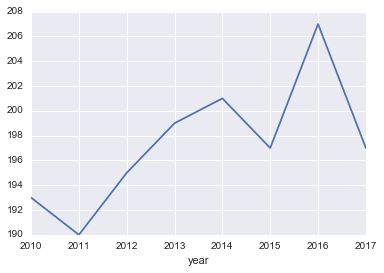

In [184]:
# by year:
by_year = data_.groupby('year', group_keys = False).size()
by_year.plot()